LABEVALUATION-3
ROLL NO.: CB.EN.U4CSE20217

Specific Requirements:
1. Draw the histograms of the two distributions in the sample(2), and state your
inferences(1).
2. Which statistical test would you employ?(2)
3. State the Null and Alternative Hypothesis (1).
4. What statistic do you recommend to apply for this case(2)?
5. State the observed statistic(2)
6. Simulate the test statistic under the Null that will help make the decision(3).
7. Draw a histogram to depict what the model of random selection predicts about the
statistic.(3)
8. Evaluate the empirical p-value of the test(3).
9. What is the outcome of your analysis? (1)


1.Draw the histograms of the two distributions in the sample(2), and state your inferences(1).

In [82]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np
import pandas as pd

In [83]:
baby = pd.read_csv('/content/test.csv')
baby

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [84]:
smoking_and_birthweight = baby[['Maternal Smoker', 'Birth Weight']]
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [85]:
smoker = smoking_and_birthweight['Birth Weight'] [smoking_and_birthweight['Maternal Smoker'] == True]
smoker

2       128
3       108
8       143
10      144
11      141
       ... 
1162    143
1163    113
1164    109
1165    103
1171    130
Name: Birth Weight, Length: 459, dtype: int64

In [86]:
non_smoker = smoking_and_birthweight['Birth Weight'] [smoking_and_birthweight['Maternal Smoker'] == False]
non_smoker

0       120
1       113
4       136
5       138
6       132
       ... 
1168    132
1169    113
1170    128
1172    125
1173    117
Name: Birth Weight, Length: 715, dtype: int64

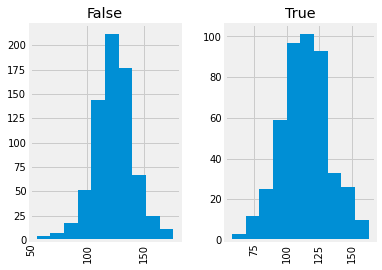

In [87]:
baby.hist(column='Birth Weight', by='Maternal Smoker');

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

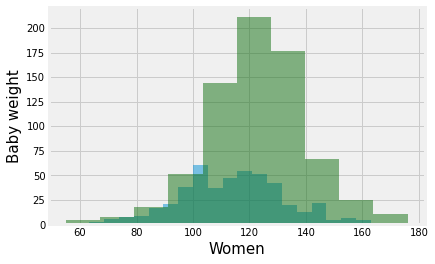

In [89]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=0.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=0.5, color=sns.desaturate("green", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Baby weight',fontsize=15)
plt.show()

The distribution of the weights of the babies born to mothers who smoked  is shifted slightly to the left of the distribution of non-smoking mothers. The weights of the babies of the mothers who smoked seem lower than the weights of the babies of the non-smokers.

2.Which statistical test would you employ?(2)


The alternative hypothesis states that on average the baby weight of non-smoker mothers is higher than the baby weight of smoker mothers So we are going to take the difference between the mean of the two samples as the statistic for this test.

3.State the Null and Alternative Hypothesis (1).

Null hypothesis: In the population, the distribution of birth weights of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is just due to chance.

Alternative hypothesis: In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers


4.What statistic do you recommend to apply for this case(2)?

We will do the subtraction in the order "average weight of the smoking group - average weight of the non-smoking group" as test statistic .

In [90]:
meanstable = smoking_and_birthweight.groupby('Maternal Smoker').mean()
meanstable

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [91]:
observed_diff = meanstable['Birth Weight'][0]-meanstable['Birth Weight'][1]
observed_diff

9.266142572024918

5.The observed value of the test statistic is about 9.3 approximately.

6.Simulate the test statistic under the Null that will help make the decision(3).

In [92]:
shuffled = smoking_and_birthweight.sample(1174,replace = False)
shuffled

,Maternal Smoker,Birth Weight
663,False,166
750,True,125
993,True,102
78,False,129
770,False,134
...,...,...
369,False,145
130,True,100
718,False,144
451,False,133


In [93]:
shuffled_weights = shuffled['Birth Weight']

In [94]:
original_and_shuffled= smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
original_and_shuffled

,Maternal Smoker,Birth Weight,shuffled_weights
0,False,120,166
1,False,113,125
2,True,128,102
3,True,108,129
4,False,136,134
...,...,...,...
1169,False,113,145
1170,False,128,100
1171,True,130,144
1172,False,125,133


In [95]:
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
all_group_means

,Birth Weight,shuffled_weights
Maternal Smoker,,
False,123.085315,119.916084
True,113.819172,118.755991


In [96]:
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

1.1600926306808645

In [97]:
import numpy as np
import array
differences = np.zeros(3500)
for i in np.arange(3500):
    smoking_and_birthweight = baby[['Maternal Smoker', 'Birth Weight']]
    shuffled = smoking_and_birthweight.sample(1174,replace = False)
    shuffled_weights = shuffled['Birth Weight']
    original_and_shuffled = smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i] = difference

In [98]:
differences

array([ 1.47131344, -0.05259533, -0.53910142, ...,  1.31033716,
       -0.32088913,  2.07586879])

In [99]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
differences_df = pd.DataFrame(differences)
differences_df

,0
0,1.471313
1,-0.052595
2,-0.539101
3,1.489200
4,-0.460402
...,...
3495,0.154885
3496,-0.728696
3497,1.310337
3498,-0.320889


Observed Difference: 9.266142572024918


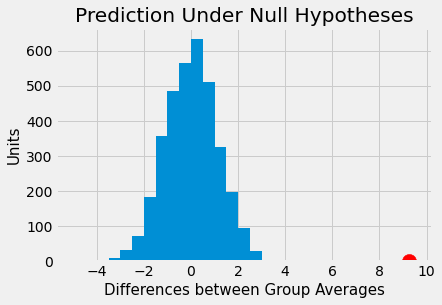

In [100]:
differences_df.hist(bins = np.arange(-5,10,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15)
plt.scatter(observed_diff, 0, color='red', s=200)
print('Observed Difference:', observed_diff)


7) The distribution is centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

The observed difference in the original sample is about 9.3 approx,which falls far way from histogram in the critical region to the left side.

8.Evaluate the empirical p-value of the test(3).


In [101]:
empirical_P = np.count_nonzero(differences >= observed_diff)/differences.size
empirical_P

0.0

In [102]:
print('Observed Distance', observed_diff)
print('Empirical P-value:', round(empirical_P, 2) *100, '%')

Observed Distance 9.266142572024918
Empirical P-value: 0.0 %


The empirical P-value is 0, meaning that none of the 3,500 observed samples resulted in a difference of 9.27 or higher. This is an approximation; the exact chance of getting a difference in that range is not 0 but it is vanishingly small.

9) As the test statistic falls in critical region far away from histogram , we have enough evidence to support alternate hypothesis and to reject null hypothesis.

The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent.

The conclusion of the test is that the data support the alternative more than they support the null. The average birth weight of babies born to mothers who smoke is less than the average birth weight of babies born to non-smokers